# Naukri Web Scraping

### Naukri Web Scraping is the project based on scraping jobs post related to any domains and their details. It also analyse the scraped data.

In [1]:
# import library
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import time
import re

In [2]:
# install chromedriver for test
driver=webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [3]:
# create dictionary for dataframe
jobs={"job_no":[],
    "roles":[],
     "companies":[],
     "locations":[],
     "experience":[],
      "salaries":[],
     "skills":[]}

In [4]:
type(jobs)

dict

In [5]:
# link of website you want to scrap
for i in range(20):
    driver.get("https://www.naukri.com/data-scientist-jobs-{}".format(i))
    time.sleep(3)
    lst=driver.find_elements(By.CLASS_NAME,"srp-jobtuple-wrapper")
    
    # scrape the data from website
    for index,job in enumerate(lst):
        driver.implicitly_wait(10)
        jobno = (i * len(lst) + index + 1)
        
        # Initialize variables to None
        role = company = location = exp = salary = skill = None  
        
        # scrap data from class_name
        role=job.find_element(By.CLASS_NAME,"title").text
        company=job.find_element(By.CLASS_NAME,"comp-name").text
        location = job.find_element(By.CLASS_NAME, "loc-wrap").text
        exp=job.find_element(By.CLASS_NAME,"exp-wrap").text
        salary=job.find_element(By.CLASS_NAME,"sal-wrap").text
    
        try:
            skill_ul=job.find_element(By.CLASS_NAME,"tags-gt")
            skill_li=skill_ul.find_elements(By.TAG_NAME,"li")
            skill_tag=[]
            for li in skill_li:
                skill_tag.append(li.text)
            skill = ','.join(skill_tag)
        except NoSuchElementException:
            skill = "NA"
        
        #convert list to string
        jobs["job_no"].append(jobno)
        jobs["roles"].append(role)
        jobs["companies"].append(company)
        jobs["locations"].append(location)
        jobs["experience"].append(exp)
        jobs["salaries"].append(salary)
        jobs["skills"].append(skill)

In [6]:
# tranform data into dataframe
df_raw=pd.DataFrame.from_dict(jobs)
df_raw.head(10)

,job_no,roles,companies,locations,experience,salaries,skills
0,1,"Data Scientist, Marketing",Coursera,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",4-6 Yrs,Not disclosed,"Data analysis,data science,Troubleshooting,Ana..."
1,2,Data Scientist,Tech Mahindra,"Hybrid - Hyderabad, Pune, Bengaluru",6-10 Yrs,Not disclosed,"ML Engineer,Deep learning,Generarative AI,GenA..."
2,3,Data Scientist-Senior Associate - P&T Labs,PwC Service Delivery Center,"Mumbai, Hyderabad, Bengaluru",4-6 Yrs,Not disclosed,"Automation,GCP,Analytical,Process improvement,..."
3,4,Data Scientist,Infosys,"Hybrid - Hyderabad, Pune, Bengaluru",4-8 Yrs,Not disclosed,"OOPS,Machine Learning,Python,Data,Machine"
4,5,Data Scientist HTHD,Ford,"Kolkata, Mumbai, New Delhi, Hyderabad, Pune, C...",1-4 Yrs,Not disclosed,"Computer science,GCP,Analytical,Artificial Int..."
5,6,NLP Data Scientist - Real World Data (RWD),Agilite Global Solutions,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",7-8 Yrs,Not disclosed,"Computer science,Health insurance,Pharma,Analy..."
6,7,DS - NLP Expert,Genpact,"Hyderabad, Telangana, Gurugram, Haryana, Banga...",6-11 Yrs,Not disclosed,"Natural Language Processing,Nltk,Rnn,Lstm,LLMs..."
7,8,Generative AI Data Scientist,Genpact,"Hyderabad, Gurugram, Bengaluru",8-13 Yrs,Not disclosed,"Generative AI,LLM,Predictive Modeling,Natural ..."
8,9,Advisory Service Senior Consultant - Data Scie...,Optum,Hyderabad,8-12 Yrs,Not disclosed,"Machine Learning,algorithms,data science,Natur..."
9,10,Lead Data Scientist,Cornerstone,"Mumbai, Hyderabad, Pune",6-9 Yrs,Not disclosed,"Artificial Intelligence,Natural Language Proce..."


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job_no      400 non-null    int64 
 1   roles       400 non-null    object
 2   companies   400 non-null    object
 3   locations   400 non-null    object
 4   experience  400 non-null    object
 5   salaries    400 non-null    object
 6   skills      400 non-null    object
dtypes: int64(1), object(6)
memory usage: 22.0+ KB


In [8]:
# lower case all the strings to avoid redundancy
df_raw=df_raw.apply(lambda x: x.astype(str).str.lower())
df_raw.head()

,job_no,roles,companies,locations,experience,salaries,skills
0,1,"data scientist, marketing",coursera,"kolkata, mumbai, new delhi, hyderabad/secunder...",4-6 yrs,not disclosed,"data analysis,data science,troubleshooting,ana..."
1,2,data scientist,tech mahindra,"hybrid - hyderabad, pune, bengaluru",6-10 yrs,not disclosed,"ml engineer,deep learning,generarative ai,gena..."
2,3,data scientist-senior associate - p&t labs,pwc service delivery center,"mumbai, hyderabad, bengaluru",4-6 yrs,not disclosed,"automation,gcp,analytical,process improvement,..."
3,4,data scientist,infosys,"hybrid - hyderabad, pune, bengaluru",4-8 yrs,not disclosed,"oops,machine learning,python,data,machine"
4,5,data scientist hthd,ford,"kolkata, mumbai, new delhi, hyderabad, pune, c...",1-4 yrs,not disclosed,"computer science,gcp,analytical,artificial int..."


In [9]:
df_raw.isnull().sum()

job_no        0
roles         0
companies     0
locations     0
experience    0
salaries      0
skills        0
dtype: int64

In [10]:
df_raw.head(5)

,job_no,roles,companies,locations,experience,salaries,skills
0,1,"data scientist, marketing",coursera,"kolkata, mumbai, new delhi, hyderabad/secunder...",4-6 yrs,not disclosed,"data analysis,data science,troubleshooting,ana..."
1,2,data scientist,tech mahindra,"hybrid - hyderabad, pune, bengaluru",6-10 yrs,not disclosed,"ml engineer,deep learning,generarative ai,gena..."
2,3,data scientist-senior associate - p&t labs,pwc service delivery center,"mumbai, hyderabad, bengaluru",4-6 yrs,not disclosed,"automation,gcp,analytical,process improvement,..."
3,4,data scientist,infosys,"hybrid - hyderabad, pune, bengaluru",4-8 yrs,not disclosed,"oops,machine learning,python,data,machine"
4,5,data scientist hthd,ford,"kolkata, mumbai, new delhi, hyderabad, pune, c...",1-4 yrs,not disclosed,"computer science,gcp,analytical,artificial int..."


In [11]:
# save raw data to local
df_raw.to_csv('Raw_Data_Naukri.csv')

In [12]:
# there are more than one loaction and skills are attached to each job, let split the location and skill
df_raw['skills']=[skill.split(",") for skill in df_raw.skills]
df_raw['locations']=[location.split(",") for location in df_raw.locations]

# remove 'lac pa' and ' yrs' from salaries and experience column
df_raw['salaries'] = df_raw['salaries'].str.replace(' lacs pa', '')
df_raw['experience'] = df_raw['experience'].str.replace(' yrs', '')

In [13]:
df_raw.head(10)

,job_no,roles,companies,locations,experience,salaries,skills
0,1,"data scientist, marketing",coursera,"[kolkata, mumbai, new delhi, hyderabad/secu...",4-6,not disclosed,"[data analysis, data science, troubleshooting,..."
1,2,data scientist,tech mahindra,"[hybrid - hyderabad, pune, bengaluru]",6-10,not disclosed,"[ml engineer, deep learning, generarative ai, ..."
2,3,data scientist-senior associate - p&t labs,pwc service delivery center,"[mumbai, hyderabad, bengaluru]",4-6,not disclosed,"[automation, gcp, analytical, process improvem..."
3,4,data scientist,infosys,"[hybrid - hyderabad, pune, bengaluru]",4-8,not disclosed,"[oops, machine learning, python, data, machine]"
4,5,data scientist hthd,ford,"[kolkata, mumbai, new delhi, hyderabad, pu...",1-4,not disclosed,"[computer science, gcp, analytical, artificial..."
5,6,nlp data scientist - real world data (rwd),agilite global solutions,"[kolkata, mumbai, new delhi, hyderabad/secu...",7-8,not disclosed,"[computer science, health insurance, pharma, a..."
6,7,ds - nlp expert,genpact,"[hyderabad, telangana, gurugram, haryana, ...",6-11,not disclosed,"[natural language processing, nltk, rnn, lstm,..."
7,8,generative ai data scientist,genpact,"[hyderabad, gurugram, bengaluru]",8-13,not disclosed,"[generative ai, llm, predictive modeling, natu..."
8,9,advisory service senior consultant - data scie...,optum,[hyderabad],8-12,not disclosed,"[machine learning, algorithms, data science, n..."
9,10,lead data scientist,cornerstone,"[mumbai, hyderabad, pune]",6-9,not disclosed,"[artificial intelligence, natural language pro..."


## Analyse Experience of Job

In [14]:
# count experience in each category
experience_counts = df_raw['experience'].value_counts()
print(experience_counts)

experience
3-8                27
6-11               25
5-10               20
3-7                16
5-9                16
                   ..
0-3                 1
9-10                1
6-12                1
12-14               1
15 may - 17 may     1
Name: count, Length: 69, dtype: int64


In [15]:
# Calculate the counts of each salary category
experience_counts = df_raw['experience'].value_counts()

# Calculate the total number of entries
total_exp_range = len(df_raw['experience'])

# Calculate the percentage of each salary category
experience_percentages = (experience_counts / total_exp_range) * 100

print("Experience Categories and their Percentages:")
print(experience_percentages)

Experience Categories and their Percentages:
experience
3-8                6.75
6-11               6.25
5-10               5.00
3-7                4.00
5-9                4.00
                   ... 
0-3                0.25
9-10               0.25
6-12               0.25
12-14              0.25
15 may - 17 may    0.25
Name: count, Length: 69, dtype: float64


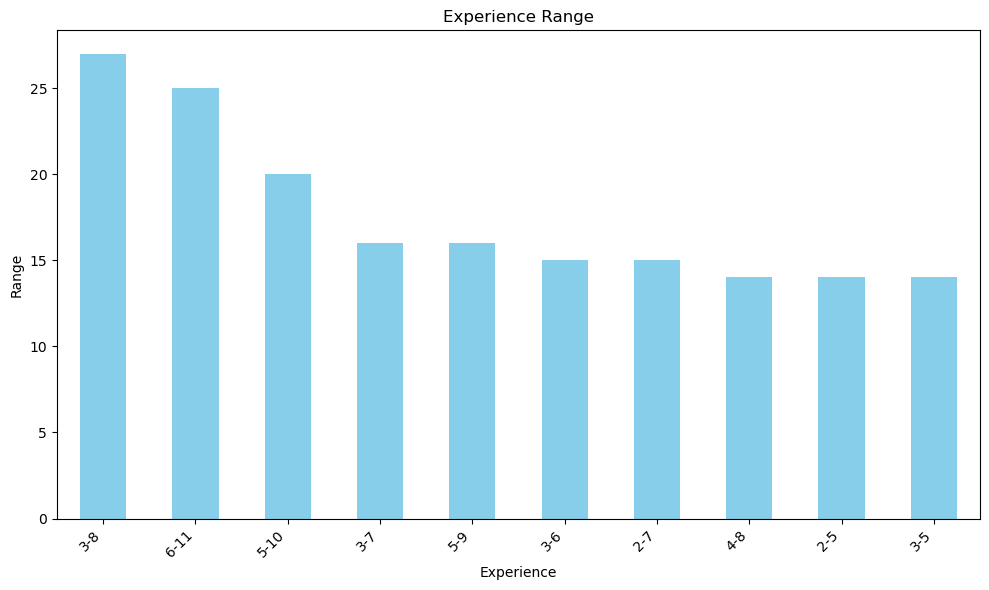

In [16]:
# plot graph for experience of job posting (top 10)
new_experience_counts=df_raw['experience'].value_counts().head(10)
plt.figure(figsize=(10, 6))
new_experience_counts.plot(kind='bar', color='skyblue')
plt.title('Experience Range')
plt.xlabel('Experience')
plt.ylabel('Range')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Analyse Salary of Job

In [17]:
# count salaries in each category
salaries_counts = df_raw['salaries'].value_counts()
print(salaries_counts)

salaries
not disclosed    373
15-25              3
unpaid             3
10-20              2
20-35              2
6-8                1
35-40              1
18-22.5            1
12-15              1
20-30              1
25-35              1
10-18              1
35-45              1
7.5-17.5           1
30-35              1
12-22              1
10-19              1
12-16              1
7-17               1
18-25              1
8-15               1
5-9                1
Name: count, dtype: int64


In [18]:
# Calculate the counts of each salary category
salaries_counts = df_raw['salaries'].value_counts()

# Calculate the total number of entries
total_salaries = len(df_raw['salaries'])

# Calculate the percentage of each salary category
salaries_percentages = (salaries_counts / total_salaries) * 100

print("Salary Categories and their Percentages:")
print(salaries_percentages)

Salary Categories and their Percentages:
salaries
not disclosed    93.25
15-25             0.75
unpaid            0.75
10-20             0.50
20-35             0.50
6-8               0.25
35-40             0.25
18-22.5           0.25
12-15             0.25
20-30             0.25
25-35             0.25
10-18             0.25
35-45             0.25
7.5-17.5          0.25
30-35             0.25
12-22             0.25
10-19             0.25
12-16             0.25
7-17              0.25
18-25             0.25
8-15              0.25
5-9               0.25
Name: count, dtype: float64


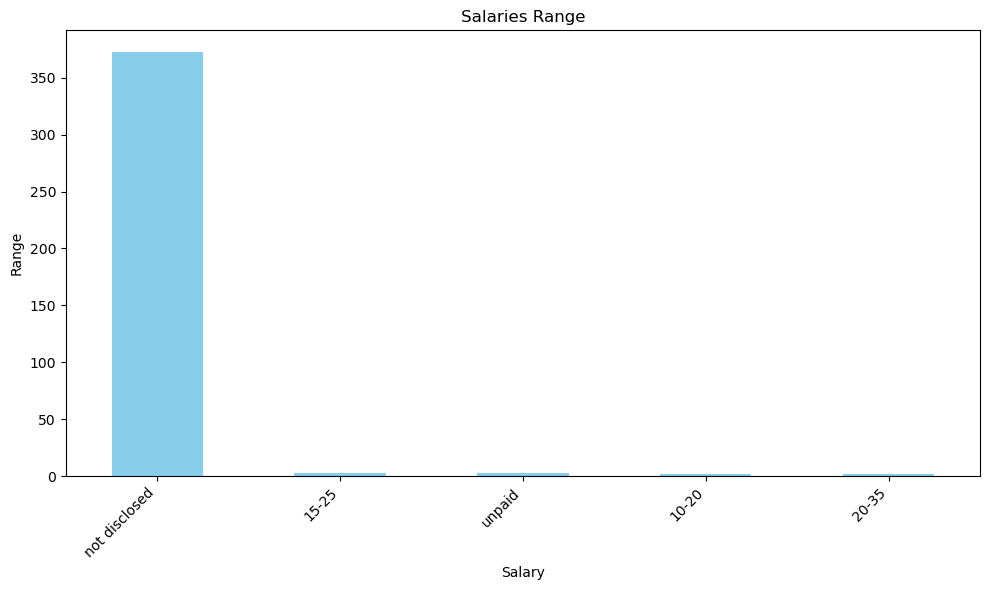

In [19]:
# plot graph for salaries of job posting (top 5)
new_salaries_counts=df_raw['salaries'].value_counts().head(5)
plt.figure(figsize=(10, 6))
new_salaries_counts.plot(kind='bar', color='skyblue')
plt.title('Salaries Range')
plt.xlabel('Salary')
plt.ylabel('Range')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Analyse Location of Job

In [20]:
# Splitting the 'locations' column by comma and exploding it into multiple rows
df_raw_location = df_raw.assign(Values=df_raw['locations'].str.split(',')).explode('locations')
# Creating a new DataFrame with two columns
df_location = df_raw_location[['job_no', 'locations']]

print(df_location.head(5))

  job_no                locations
0      1                  kolkata
0      1                   mumbai
0      1                new delhi
0      1   hyderabad/secunderabad
0      1                     pune


In [21]:
df_location.head(15)

,job_no,locations
0,1,kolkata
0,1,mumbai
0,1,new delhi
0,1,hyderabad/secunderabad
0,1,pune
0,1,chennai
0,1,bangalore/bengaluru
1,2,hybrid - hyderabad
1,2,pune
1,2,bengaluru


In [22]:
# Print distinct values in the 'Category' column
distinct_values = df_location['locations'].unique()
for value in distinct_values:
    print(value)

kolkata
 mumbai
 new delhi
 hyderabad/secunderabad
 pune
 chennai
 bangalore/bengaluru
hybrid - hyderabad
 bengaluru
mumbai
 hyderabad
hyderabad
 telangana
 gurugram
 haryana
 bangalore/ bengaluru
 karnataka
hybrid - navi mumbai
 ahmedabad
 delhi / ncr
 navi mumbai
 mumbai (all areas)
 bangalore rural
hybrid - kolkata
bengaluru
kochi
 hyderabad/ secunderabad
 maharashtra
pune
remote
hyderabad/secunderabad
noida
 kolkata
hybrid - bengaluru
vijayawada
greater noida
gurugram
faridabad
hybrid - pune
new delhi
dehradun
chennai
 mumbai suburban
indore
 nagpur
ahmedabad
gurugram(sector-3a gurgaon)
kalyani
mumbai (all areas)
hybrid - chandigarh
hybrid - gurugram
 west bengal
 coimbatore
hybrid - bangalore rural
 jamshedpur
bangalore rural
hybrid - noida
ernakulam
hybrid - mumbai
 thiruvananthapuram


In [23]:
def replace_location(location):
    # Define patterns to match
    patterns = [
        r'\(.*\)',  # Matches anything within parentheses
        r'hybrid\s*-\s*',  # Matches "hybrid - "
        r'\bnew\s',# Matches "new "
        r'\s*', #Match space
        r'/.*$' #Match after /
    ]
    
    # Apply replacements
    for pattern in patterns:
        location = re.sub(pattern, '', location)
    return location.strip()  # Remove leading/trailing spaces

new_df_location = df_location.copy()

# Apply the function to the DataFrame
new_df_location['locations'] = df_location['locations'].apply(replace_location)
print(new_df_location)

    job_no       locations
0        1         kolkata
0        1          mumbai
0        1           delhi
0        1       hyderabad
0        1            pune
..     ...             ...
396    397       bengaluru
397    398       bengaluru
398    399       bengaluru
399    400  bangalorerural
399    400         chennai

[861 rows x 2 columns]


In [24]:
# Print distinct values in the 'Category' column
distinct_values2 = new_df_location['locations'].unique()
for value in distinct_values2:
    print(value)

kolkata
mumbai
delhi
hyderabad
pune
chennai
bangalore
bengaluru
telangana
gurugram
haryana
karnataka
navimumbai
ahmedabad
bangalorerural
kochi
maharashtra
remote
noida
vijayawada
greaternoida
faridabad
dehradun
mumbaisuburban
indore
nagpur
kalyani
chandigarh
westbengal
coimbatore
jamshedpur
ernakulam
thiruvananthapuram


In [25]:
def replace_location(location):
    # Define replacements using a dictionary
    replacements = {
        r'\b\w*mumbai\w*\b': 'mumbai',  # Matches any word containing "mumbai"
        r'\b\w*delhi\w*\b': 'delhi' ,    # Matches any word containing "delhi"
        r'\b\w*bangal\w*\b': 'bengaluru', # Matches any word containing "bengaluru"
        r'\b\w*noida\w*\b': 'noida'  # Matches any word containing "noida"
    } 
    
    # Apply replacements
    for pattern, replacement in replacements.items():
        location = re.sub(pattern, replacement, location)
    
    return location.strip()  # Remove leading/trailing spaces

# Apply the function to the DataFrame
new_df_location['locations'] = new_df_location['locations'].apply(replace_location)

In [26]:
# count locations in each category
location_counts = new_df_location['locations'].value_counts()
print(location_counts)

locations
hyderabad             203
bengaluru             192
pune                   99
mumbai                 97
chennai                80
kolkata                49
delhi                  48
gurugram               39
noida                  15
remote                  7
karnataka               5
coimbatore              4
ahmedabad               4
telangana               3
haryana                 2
faridabad               2
kalyani                 1
ernakulam               1
jamshedpur              1
westbengal              1
chandigarh              1
indore                  1
nagpur                  1
dehradun                1
vijayawada              1
maharashtra             1
kochi                   1
thiruvananthapuram      1
Name: count, dtype: int64


In [27]:
# Calculate the counts of each location category
location_counts = new_df_location['locations'].value_counts()

# Calculate the total number of location
total_location = len(new_df_location['locations'])

# Calculate the percentage of each location category
location_percentages = (location_counts / total_location) * 100

print("Location Categories and their Percentages:")
print(location_percentages)

Location Categories and their Percentages:
locations
hyderabad             23.577236
bengaluru             22.299652
pune                  11.498258
mumbai                11.265970
chennai                9.291521
kolkata                5.691057
delhi                  5.574913
gurugram               4.529617
noida                  1.742160
remote                 0.813008
karnataka              0.580720
coimbatore             0.464576
ahmedabad              0.464576
telangana              0.348432
haryana                0.232288
faridabad              0.232288
kalyani                0.116144
ernakulam              0.116144
jamshedpur             0.116144
westbengal             0.116144
chandigarh             0.116144
indore                 0.116144
nagpur                 0.116144
dehradun               0.116144
vijayawada             0.116144
maharashtra            0.116144
kochi                  0.116144
thiruvananthapuram     0.116144
Name: count, dtype: float64


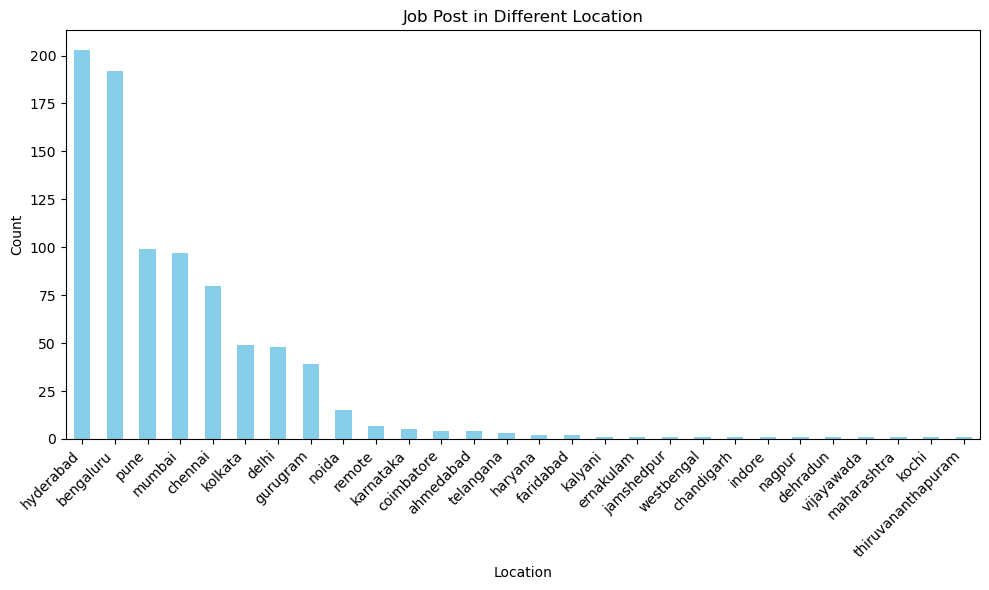

In [28]:
# plot graph for locations of job posting
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Job Post in Different Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

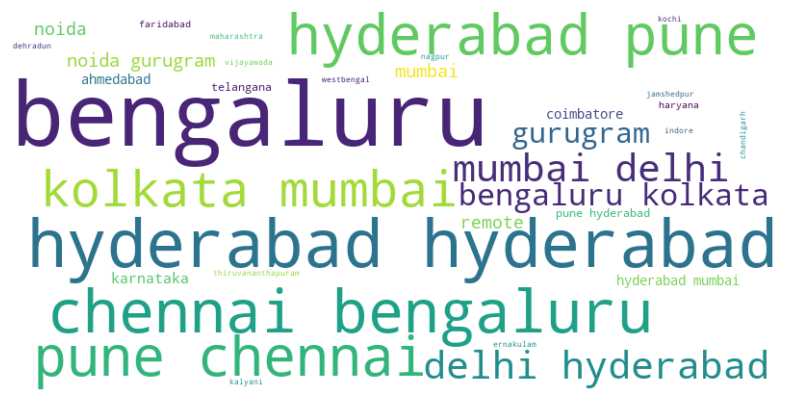

In [29]:
# Assuming df is your DataFrame containing a 'location' column
location_string = ', '.join(new_df_location['locations'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(location_string)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

## Analyse Skills of Job

In [30]:
# Splitting the 'skills' column by comma and exploding it into multiple rows
df_raw_skills = df_raw.assign(Values=df_raw['skills'].str.split(',')).explode('skills')
# Creating a new DataFrame with two columns
df_skills = df_raw_skills[['job_no', 'skills']]

print(df_skills.head(5))

  job_no           skills
0      1    data analysis
0      1     data science
0      1  troubleshooting
0      1        analytics
0      1       monitoring


In [31]:
df_skills.head(15)

,job_no,skills
0,1,data analysis
0,1,data science
0,1,troubleshooting
0,1,analytics
0,1,monitoring
0,1,sql
0,1,python
0,1,salesforce
1,2,ml engineer
1,2,deep learning


In [32]:
# Print distinct values in the 'Category' column
distinct_skill = df_skills['skills'].unique()
print(distinct_skill)

['data analysis' 'data science' 'troubleshooting' 'analytics' 'monitoring'
 'sql' 'python' 'salesforce' 'ml engineer' 'deep learning'
 'generarative ai' 'genai' 'mlops' 'ml ops' 'natural language processing'
 'cloud' 'automation' 'gcp' 'analytical' 'process improvement'
 'machine learning' 'signal processing' 'data mining' 'oops' 'data'
 'machine' 'computer science' 'artificial intelligence' 'agile'
 'algorithm development' 'business solutions' 'operations'
 'health insurance' 'pharma' 'healthcare' 'life sciences' 'open source'
 'nltk' 'rnn' 'lstm' 'llms' 'text mining' 'bert' 'generative ai' 'llm'
 'predictive modeling' 'computer vision' 'processing' 'vision'
 'algorithms' 'pandas' 'scikit-learn' 'data structures' 'spark'
 'intelligence' 'languages' 'process' 'career development'
 'diversity and inclusion' 'manager technology' 'subject matter expertise'
 'forecasting' 'mining' 'statistical programming'
 'business transformation' 'team management' 'issue resolution'
 'data scientist' 't

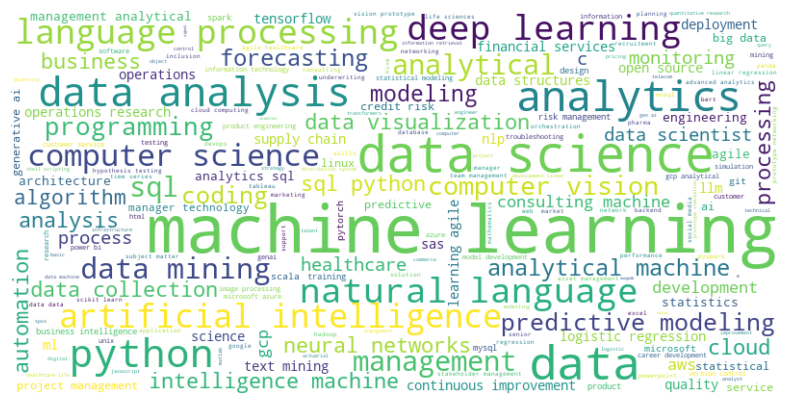

In [33]:
# Assuming df is your DataFrame containing a 'skills' column
skills_string = ', '.join(df_skills['skills'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_string)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

## Narrative (may be changed according to analyse data)

#### Data Scientist Job (analyse top 20 page of naukri.com)

- *Hyderabad and Bengalure* are most prefered job location.
- 93.25% of job post did *not disclosed salary*.
- *Machine Learning, Data Science and Data Analysis* are most prefered skills in all posted jobs.
- *Experience 3-8 yrs* is most likly experience range in posted jobs.